In [ ]:
from tkinter import Y

import numpy as np
import csv

import matplotlib.pyplot as plt

In [96]:
loc = 'data/new/1304_2d/c5+.csv'

def show_image(image, title):
    # Show Image
    fig, ax = plt.subplots()
    ax.imshow(image, interpolation = 'nearest')
    ax.set_title(f'{title} image')
    fig.set_size_inches([2,2])

def csv_to_image(path):
    # Read in data
    with open(path, newline='\n') as c_file:
        reader = csv.reader(c_file, delimiter=',')
        reader.__next__()       # Skip column definitions

        pixels = [] 

        for row in reader:
            x, y, pixel = int(row[1]), int(row[2]), int(row[3])
            pixels.append((x, y, pixel))    # Store pixel as tuple

    # Get Bounds 
    x_min = min([pixel[0] for pixel in pixels])
    x_max = max([pixel[0] for pixel in pixels])
    y_min = min([pixel[1] for pixel in pixels])
    y_max = max([pixel[1] for pixel in pixels])

    # Generate Numpy Array
    image = np.empty([y_max-y_min+1, x_max-x_min+1])

    for pixel in pixels:
        image[pixel[1] - y_min, pixel[0] - x_min] = pixel[2]

    # Show Image
    show_image(image, path)

    return image



In [97]:
def norm_background(image, title, threshold = 0.75):
    """
    Returns imaged normalized with respect to background
    """
    max_val = np.max(image)
    threshold = int(threshold * max_val)

    # Make Threshold image
    image_threshold = np.copy(image)
    image_threshold[image_threshold > threshold] = 255
    image_threshold[image_threshold <= threshold] = 0

    show_image(image_threshold, '')

    # Find Background Mean Value    
    bg_indices = np.where(image_threshold == 0)     # Fetch Indices
    avg_bg_value = np.average(image[bg_indices])

    # Normalize against background
    norm_image = (image - 50).astype(int)
    norm_image = np.clip(norm_image, 0, 255)
    return norm_image


In [98]:
def integrate_image(image):
    cum_sum = np.sum(image)
    return cum_sum

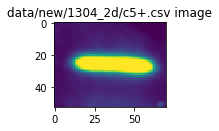

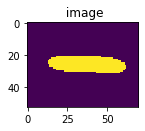

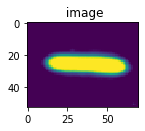

In [94]:
image = csv_to_image('data/new/1304_2d/c5+.csv')
image = norm_background(image)
show_image(image, '')

In [102]:
def integral_analysis(path_band, path_loading):
    # Pre-process
    band_image, load_image = csv_to_image(path_band), csv_to_image(path_loading)
    band_norm = norm_background(band_image, path_band)
    show_image(band_norm, path_band)
    load_norm = norm_background(load_image, path_loading)
    show_image(load_norm, path_loading)

    # Integrate
    int_band, int_load = integrate_image(band_norm), integrate_image(load_norm)

    # Enrichment
    norm_magnitude = int_band / int_load
    print(f'Magnitude (normalized): {norm_magnitude}')

Magnitude (normalized): 0.7102917233832439


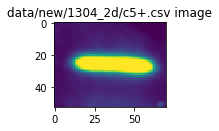

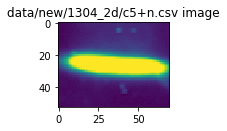

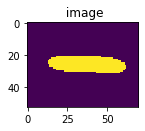

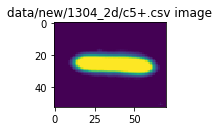

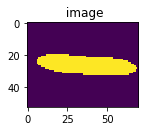

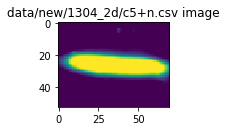

In [103]:
integral_analysis('data/new/1304_2d/c5+.csv', 'data/new/1304_2d/c5+n.csv')